## Business Case and Ojective for Traffic Sign Classification.


**Brief Description of the German Traffic Sign Dataset:**

The German Traffic Sign Dataset is a widely used benchmark dataset for traffic sign detection and classification tasks. It was created by the German Traffic Sign Recognition Benchmark (GTSRB) project and contains a large collection of images representing various traffic signs commonly found on German roads.

The dataset consists of more than 50,000 images of traffic signs captured from different angles, under different lighting conditions, and in various weather conditions. The images are divided into 43 different classes, representing different types of traffic signs such as speed limits, stop signs, yield signs, and directional signs.

Each image in the dataset is accompanied by annotations that provide information about the class of the traffic sign and its bounding box coordinates. This allows researchers and developers to train and evaluate their traffic sign detection and classification algorithms using this dataset.

The German Traffic Sign Dataset provides a diverse range of challenging scenarios, including occluded signs, partially visible signs, and signs captured from long distances. This makes it a suitable dataset for testing the robustness and accuracy of traffic sign detection and classification algorithms.

The dataset is widely used in the research community for developing and evaluating computer vision models and algorithms for traffic sign detection. It has also been used as a benchmark dataset in various competitions and challenges related to traffic sign recognition.

The availability of a large number of annotated images in the dataset enables the training of deep learning models, such as convolutional neural networks (CNNs), to achieve high accuracy in traffic sign detection and classification tasks.

Overall, the German Traffic Sign Dataset is a valuable resource for researchers, developers, and practitioners working on traffic sign detection and classification. It provides a realistic representation of the challenges faced in real-world traffic sign recognition scenarios and facilitates the development of robust and accurate computer vision solutions for traffic sign detection.
Objective: The objective of the German Traffic Sign Detection system is to develop a computer vision solution that can accurately detect and classify traffic signs in real-time. This system can be used in various applications, such as advanced driver assistance systems (ADAS), autonomous vehicles, and traffic management systems. The main goal is to enhance road safety by providing timely and accurate information about traffic signs to drivers and automated systems.
By achieving these objectives, the German Traffic Sign Detection system can contribute to improving road safety by providing accurate and real-time information about traffic signs to drivers and automated systems. It can help prevent accidents, improve traffic flow, and enhance overall transportation efficiency.

Mounting Drive to access Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Libraries**

In [1]:
import os # provides functions for interacting with the operating system, such as managing files and directories
import numpy as np # Library for numerical Computations
import matplotlib.pyplot as plt # Plotting Library
from sklearn.model_selection import train_test_split # scikit
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout # CNN architecture layers
from tensorflow.keras.models import Sequential
import pandas as pd
import random
from matplotlib.image import imread #library  for reading images

%matplotlib inline

In [5]:
data_dir = '/content/drive/MyDrive/ai internship/traffic extracted' # Parent Dierctory containing all images including their annotations in .CSV  format
train_path = '/content/drive/MyDrive/ai internship/traffic extracted/Train'
test_path = '/content/drive/MyDrive/ai internship/traffic extracted/Test'
IMG_HEIGHT = 30 # Assigning an image height of 30 so all images will have homogeneous image height to facilitate clasasification by the nodel
IMG_WIDTH = 30  # Assigning an image height of 30 so all images will have homogeneous image height to facilitate classification by the nodel since the
#orignial images containing images of different sizes hence no homogenity.

### Finding the Total Number of categories

In [6]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

This implies that there are 43 different classes of the images in the dataset.

In [21]:

# Path to the train folder
train_folder = '/content/drive/MyDrive/ai internship/traffic extracted/Train'

# Path to the dataset CSV file
csv_file_path = os.path.join(train_folder, '/content/drive/MyDrive/ai internship/traffic extracted/Train.csv')

# Read the dataset CSV file
dataset_df = pd.read_csv(csv_file_path)

# Extract the labels from the dataset
labels = dataset_df['ClassId']

# Print the labels
print(labels)

0        20
1        20
2        20
3        20
4        20
         ..
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64


In [22]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

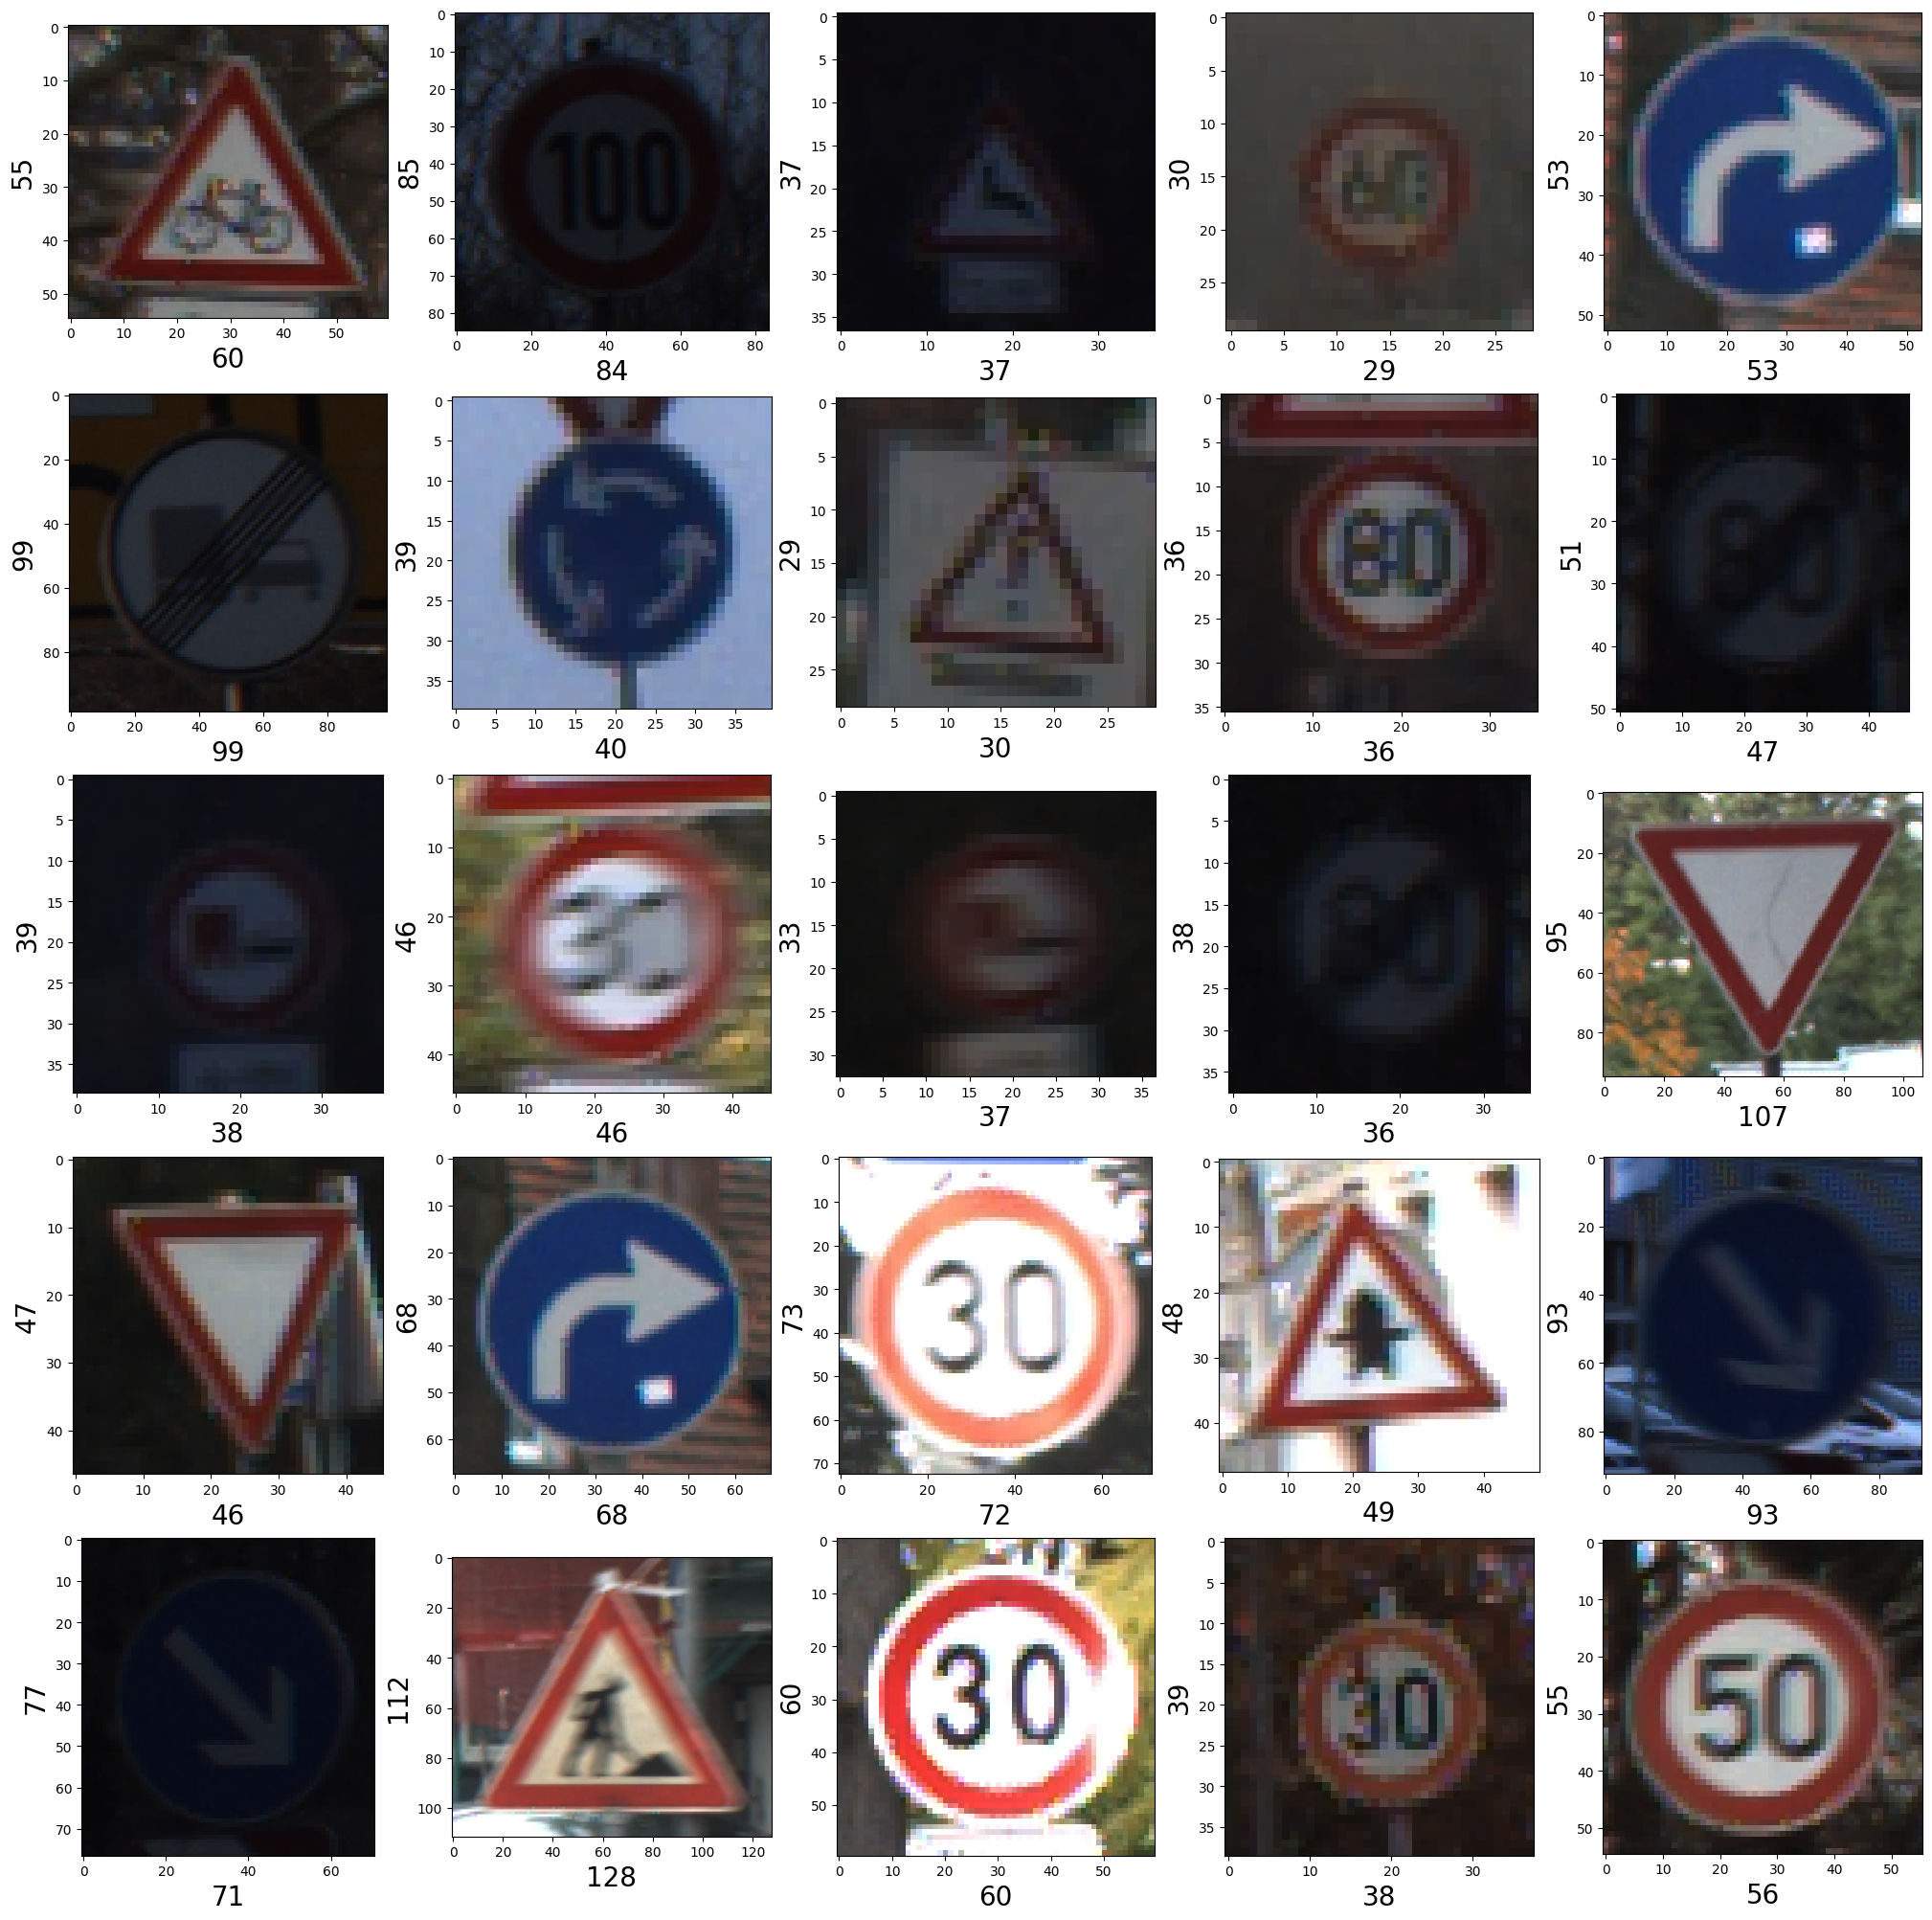

In [24]:
# Visualizing 25 random images from test data
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

Checking the distribution of the individual Classes in the entire Dataset i.e the percentage of each class interms of abundance

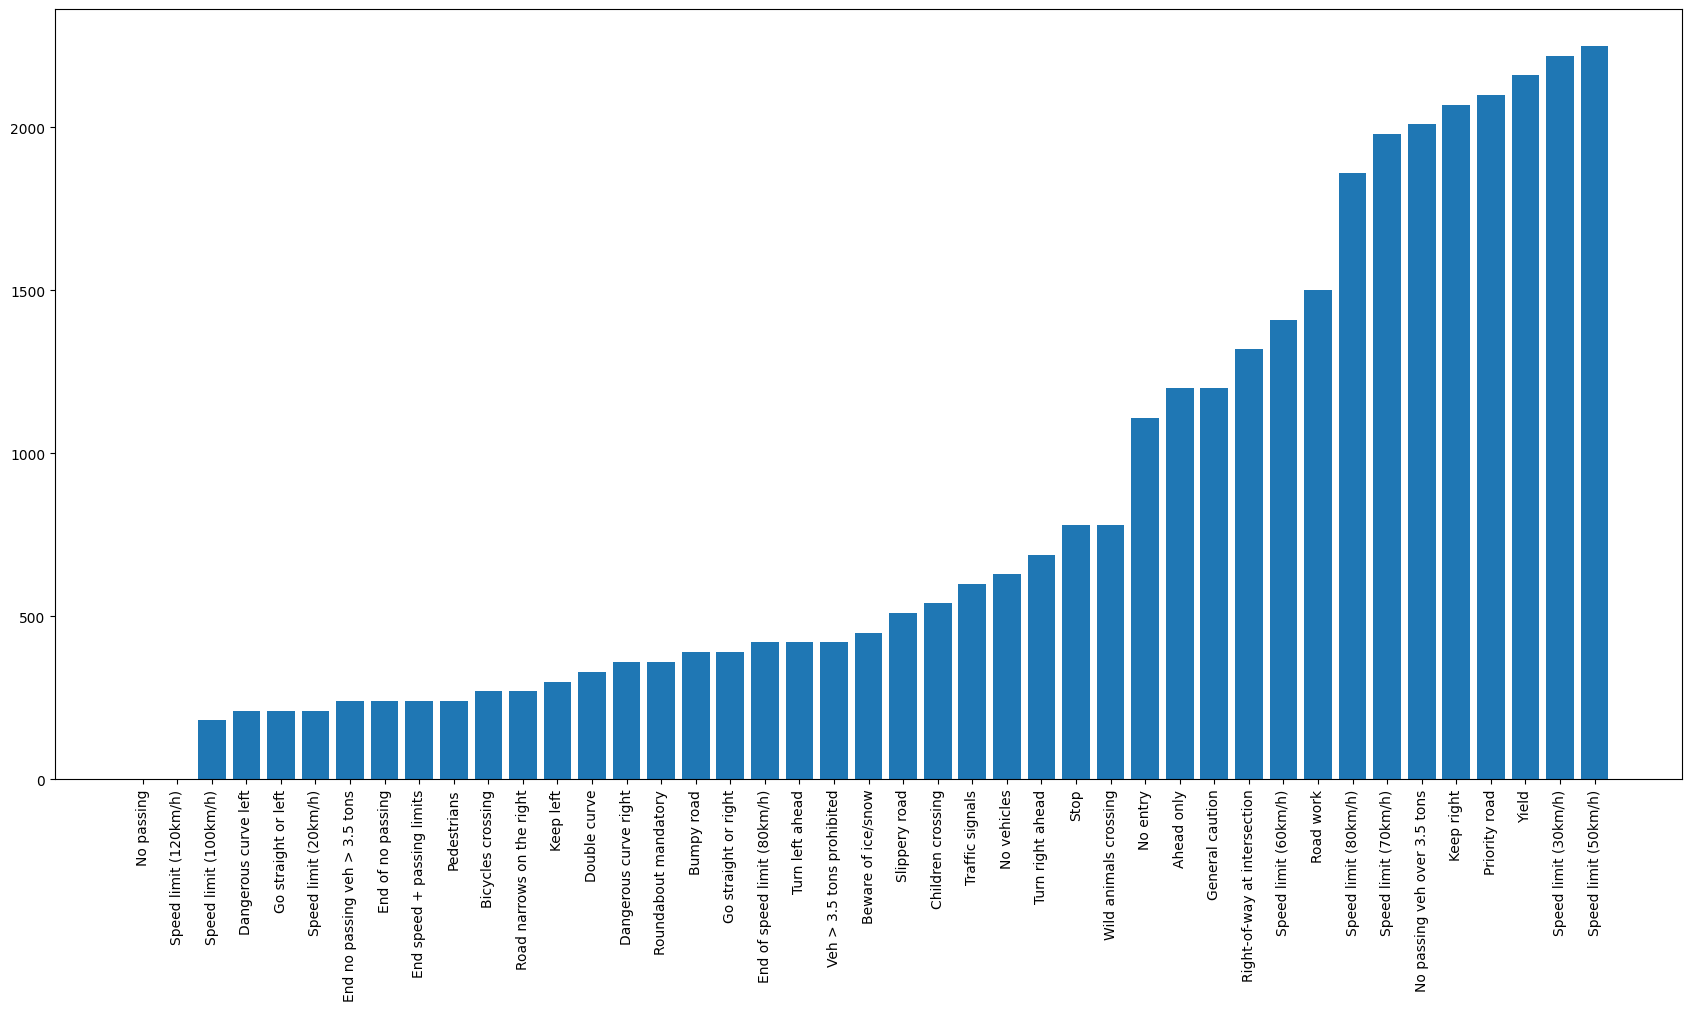

In [23]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

Comment:
The most abundant classes are: speed  limit 30km, 50km and Yield while the corresponding lower classes are  : No passing, speed limit 120 and 100 respectively.

Assigning labels and their corresponding images from the data directories

In [7]:
def load_data(data_dir):
    '''
    Loading data from Train folder.

    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3.
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)

    return images, labels


Now that we know the different types of signs...Lets categorize them and split them into Train and Test set!!

In [8]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

## Creating the Model

In [9]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))) # here shows its an RGB(colored image)
model.add(MaxPool2D(pool_size=(2, 2))) # The Max Pooling layer helps extract the most salient features from the input data
model.add(Dropout(rate=0.25)) # Use to prevent model overfitting by sending only 75% of the data  to be trained

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # Use to prevent model overfitting by sending only 75% of the data  to be trained

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [10]:
# Flattening the layer and adding Dense Layer (Fully connected layer)
model.add(Flatten())
#flattening converts multidimensional feature maps into a one-dimensional vector, enabling compatibility with fully connected layers and preserving spatial information in a format suitable for dense connections.
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax')) # used softmax because its a multiclass classifaction task.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [11]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
# Fitting the model
EPOCHS = 30 # Epochs refer to the number of times a neural network iterates over the entire training dataset during the training process.

history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs=EPOCHS,
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 52s 844ms/step - loss: 6.8653 - accuracy: 0.0626 - val_loss: 3.2794 - val_accuracy: 0.1644
Epoch 2/30
60/60 [==============================] - 47s 786ms/step - loss: 2.8635 - accuracy: 0.2788 - val_loss: 2.2278 - val_accuracy: 0.4530
Epoch 3/30
60/60 [==============================] - 48s 802ms/step - loss: 1.9846 - accuracy: 0.4654 - val_loss: 1.5452 - val_accuracy: 0.5819
Epoch 4/30
60/60 [==============================] - 41s 690ms/step - loss: 1.4102 - accuracy: 0.5864 - val_loss: 1.0271 - val_accuracy: 0.7202
Epoch 5/30
60/60 [==============================] - 41s 688ms/step - loss: 1.0319 - accuracy: 0.6872 - val_loss: 0.7161 - val_accuracy: 0.8048
Epoch 6/30
60/60 [==============================] - 42s 709ms/step - loss: 0.8011 - accuracy: 0.7609 - val_loss: 0.5387 - val_accuracy: 0.8519
Epoch 7/30
60/60 [==============================] - 47s 789ms/step - loss: 0.6197 - accuracy: 0.8129 - val_loss: 0.4180 - val_accuracy: 0.8936

Saving Model.

In [13]:
model.save('model.h5')

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set.

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

329/329 [==============================] - 8s 23ms/step - loss: 0.0627 - accuracy: 0.9872
test set accuracy:  98.71684908866882


## Plotting the Accuracy and Loss values
Now that we have seen the accuracy, lets plot it at diiferent epochs!!

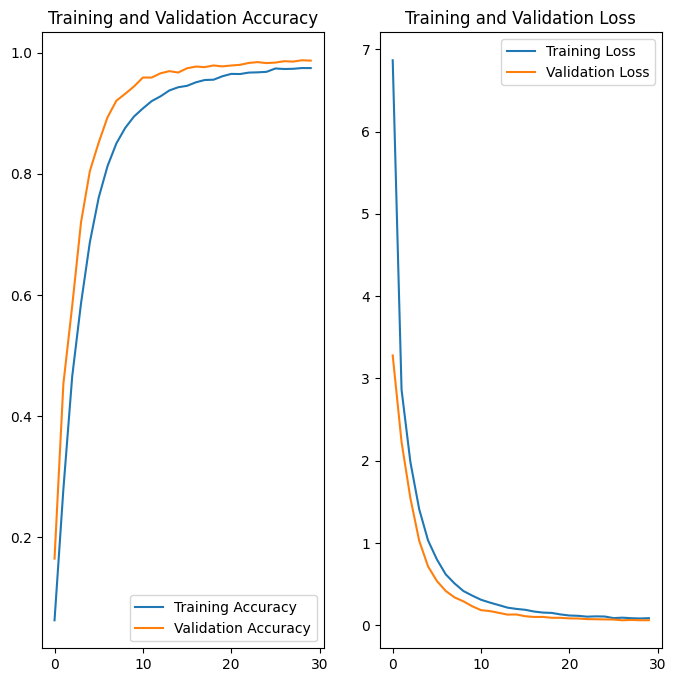

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predictions
Now, lets find the predictions on Test images!!

In [16]:
from keras.models import load_model
mod = load_model('/content/model.h5') # using the saved model to carryout predictions

In [17]:
#Readjusted my files and created monor folders to store the train,test and meta folders for easy access in the prediction step
data_dir1 = '/content/drive/MyDrive/ai internship/TRAFFIC'
train_path1 = '/content/drive/MyDrive/ai internship/TRAFFIC/TRAIN'
test_path1 = '/content/drive/MyDrive/ai internship/TRAFFIC/TEST'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [19]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv('/content/drive/MyDrive/ai internship/TRAFFIC/TEST/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path1, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred_probabilities = mod.predict(X_test)
pred_labels = np.argmax(pred_probabilities, axis=1)


#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred_labels)*100)

395/395 [==============================] - 9s 22ms/step
Test Data accuracy:  85.52652414885193


## Finally, lets visualize our models performance on some images..

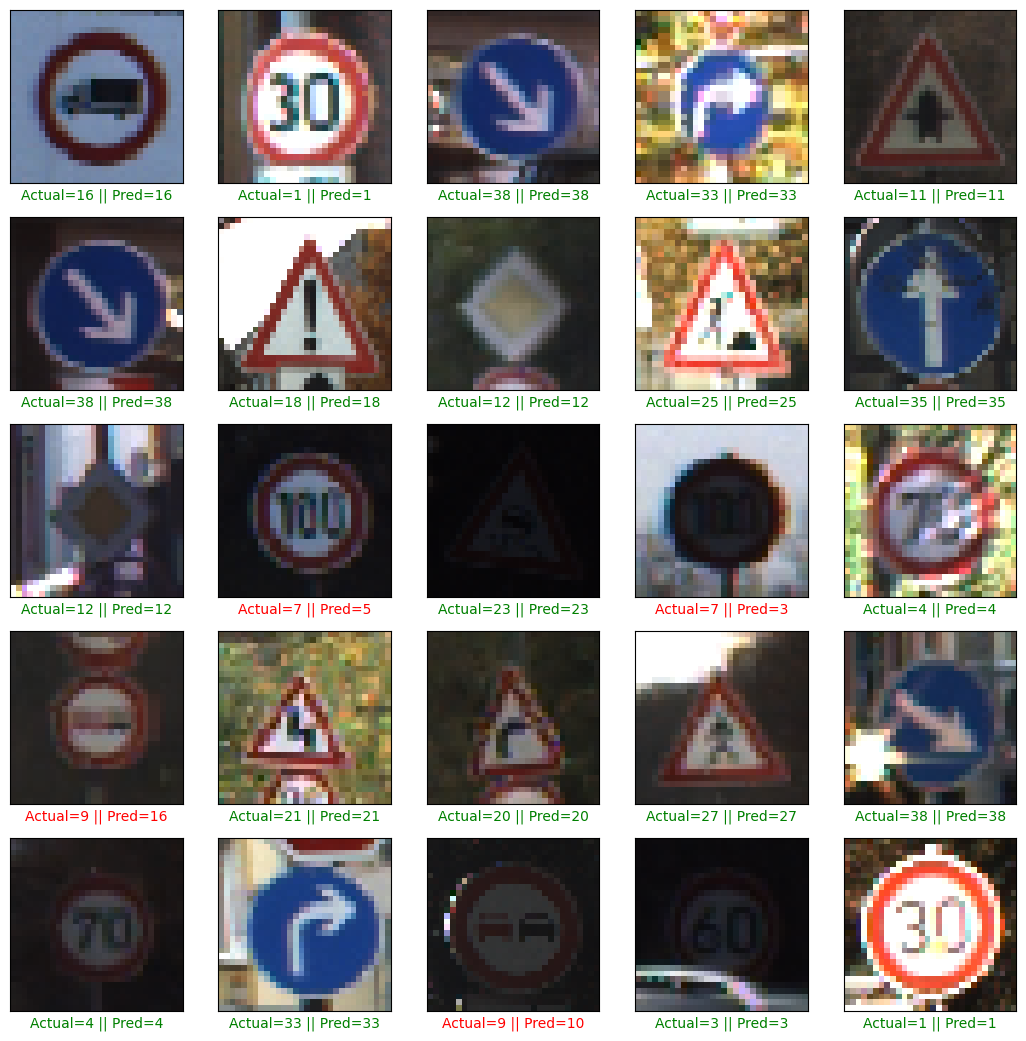

In [20]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_labels[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

Model performed good but  not Excellent as there were some incorrect predictions made.

# Conclusion:
Model performance was good and good training and validations accuracies were recorded but during testing on some images in the Test set there were some incorrect predictions recorded .This could be fixed by adding more dense layers of 128,256,512 and also using Transfer Learning or model optimization techniques like learinig and data augmentation . This however will need more computation time which was my major problem
**THANKS**